## Install Required Libraries

In [72]:
#!pip3 install mat73
#!pip3 install pymultitaper
#!pip3 install pandas
#!pip3 install numpy

In [73]:
import sys
print(sys.executable)

/run/media/ritwik_das/DATA/Workspace/MyThesisRecording/LeoFilestoRun/SzAna/bin/python


## Import Required Libraries

In [74]:
import pandas as pd
import numpy as np
import mat73
import matplotlib.pyplot as plt
from pymultitaper import multitaper_spectrogram, plot_spectrogram

## Data Reading and PreProcessing

In [75]:
# Load .mat file
data = mat73.loadmat('./lfpUCLAC.mat')["lfpUCLAC"]
# Turn seizure data into a DataFrame
data = np.concatenate((data[:, :2], data[:, 11:]), axis=1)
column_names = ["Animal", "Session"]
column_names += [f"SZ_{i}" for i in range(11, 36012)]
seizure = pd.DataFrame(data, columns=column_names)
# Read Meta Data
metadata = pd.read_csv("./ADszNov7v21LeoIv2.csv")
# Merge two DataFrames
dataset = pd.merge(metadata, seizure, on=["Animal", "Session"], how='inner')

In [76]:
dataset

,Animal,Session,group,BaseStart,BaseEnd,NoSzstart2,NoSzend2,SzArtifactStart,SzArtifactEnd,SeizureStart,...,SZ_36002,SZ_36003,SZ_36004,SZ_36005,SZ_36006,SZ_36007,SZ_36008,SZ_36009,SZ_36010,SZ_36011
0,8790,2,1,-60.0,-20.0,6.0,120,-21.00,3.20,3.3,...,0.895588,0.866927,1.000345,1.083360,1.033944,0.890641,0.746350,0.860990,0.699898,0.401434
1,8799,2,1,-60.0,-11.0,30.0,120,-12.00,19.00,20.5,...,0.128512,0.141584,0.138678,0.087841,0.079126,0.025384,0.067505,-0.051598,0.006501,0.070409
2,12224,2,1,-60.0,-8.0,13.0,120,-7.50,8.00,8.5,...,0.009078,-0.023774,-0.006766,0.009076,-0.015155,-0.015389,0.014666,-0.004905,-0.014225,0.013500
3,12233,2,1,-60.0,-3.0,30.0,120,-2.00,9.00,10.0,...,0.001998,-0.022745,0.031218,-0.214643,0.020953,0.060175,-0.098818,0.052542,-0.026954,-0.019320
4,12234,2,1,-60.0,-2.0,39.0,120,-1.00,11.00,12.0,...,0.193024,-0.020621,0.196557,0.332058,0.345042,0.281896,0.317190,0.327150,0.339630,0.317448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,12233,19,1,0.0,0.0,20.0,89,0.65,0.75,9.2,...,0.016741,0.099218,-0.023653,0.102346,0.103549,-0.060198,0.098502,0.002803,-0.011623,0.046087
165,8793,19,2,-60.0,-37.0,28.5,120,0.00,1.00,2.6,...,-0.588621,-0.241770,0.429002,0.486332,0.377403,0.214010,0.007618,0.050616,-0.045414,0.133745
166,8797,19,2,-60.0,-53.0,40.0,120,0.00,1.00,3.3,...,0.074535,-0.049774,-0.050855,0.014002,0.137230,0.119934,0.122096,0.004272,0.018324,0.037781
167,12227,19,2,-60.0,-3.0,46.0,120,0.40,1.00,8.8,...,0.420122,0.379910,0.380465,0.387676,0.385735,0.359945,0.362996,0.341087,0.320843,0.318070


In [77]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Columns: 36013 entries, Animal to SZ_36011
dtypes: float64(36008), int64(5)
memory usage: 46.4 MB


In [78]:
from scipy.signal import butter, filtfilt

# Design the bandpass filter
b, a = butter(8, [4, 40], 
              btype='bandpass', fs=200)

# Apply zero-phase filtering
fast = filtfilt(b, a, dataset.loc[:, "SZ_11":])

In [79]:
type(fast)

numpy.ndarray

In [80]:
#start_idx = dataset.columns.get_loc("SZ_11")  # Get position of "SZ_11"
rawdata = np.array(dataset.loc[:, "SZ_11":])  # Slice to second-to-last column
print(rawdata.dtype, rawdata.shape)
#plt.plot(time,rawdata)
#plt.xticks([])
#plt.show()

float64 (169, 36001)


In [81]:
# Compute the multitaper spectrogram
fs = 200
freqs, times, psd = multitaper_spectrogram(fast[1,:], fs, time_step=0.2, 
                                           window_length=1.0, NW=4)

# Plot the spectrogram
#times_edges = np.linspace(times.min(), times.max(), len(times) + 1)  # Shape (130,)
#freqs_edges = np.linspace(freqs.min(), freqs.max(), len(freqs) + 1)  # Shape (897,)


In [82]:
print(psd.shape, freqs.shape, times.shape)
print(freqs, times)

(129, 896) (129,) (896,)
[  0.        0.78125   1.5625    2.34375   3.125     3.90625   4.6875
   5.46875   6.25      7.03125   7.8125    8.59375   9.375    10.15625
  10.9375   11.71875  12.5      13.28125  14.0625   14.84375  15.625
  16.40625  17.1875   17.96875  18.75     19.53125  20.3125   21.09375
  21.875    22.65625  23.4375   24.21875  25.       25.78125  26.5625
  27.34375  28.125    28.90625  29.6875   30.46875  31.25     32.03125
  32.8125   33.59375  34.375    35.15625  35.9375   36.71875  37.5
  38.28125  39.0625   39.84375  40.625    41.40625  42.1875   42.96875
  43.75     44.53125  45.3125   46.09375  46.875    47.65625  48.4375
  49.21875  50.       50.78125  51.5625   52.34375  53.125    53.90625
  54.6875   55.46875  56.25     57.03125  57.8125   58.59375  59.375
  60.15625  60.9375   61.71875  62.5      63.28125  64.0625   64.84375
  65.625    66.40625  67.1875   67.96875  68.75     69.53125  70.3125
  71.09375  71.875    72.65625  73.4375   74.21875  75.       75

In [83]:
low_freq = 5   # Hz
high_freq = 35 # Hz
def bandpass_filter_spectrogram(freqs, psd, low_freq, high_freq):
    """Extract only the desired frequency range from spectrogram"""
    # Find frequency indices
    freq_indices = (freqs >= low_freq) & (freqs <= high_freq)
    
    # Extract bandpass frequencies and PSD
    freqs_bp = freqs[freq_indices]
    psd_bp = psd[freq_indices,:]
    
    return freqs_bp, psd_bp


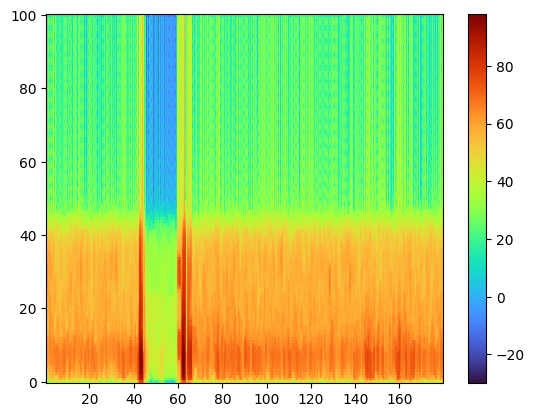

(129, 896) (129,) (896,)
(38, 896) (38,) (896,)


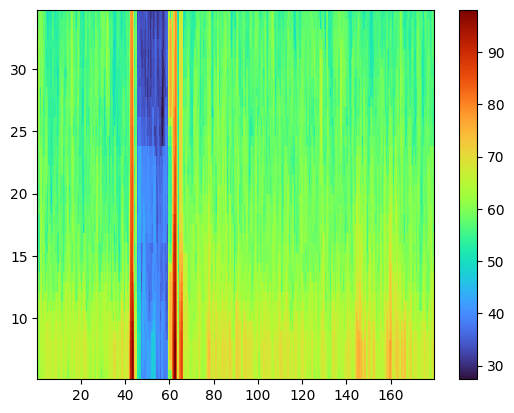

In [84]:
# Parameters
fs = 200
freq_indices = (freqs >= low_freq) & (freqs <= high_freq)
# Get dimensions from first row to initialize the 3D matrix
freqs, times, psd_temp = multitaper_spectrogram(fast[0,:], fs, time_step=0.2, 
                                                window_length=1.0, NW=4)

plt.pcolormesh(times, freqs, psd_temp, cmap = 'turbo', shading='auto')
plt.colorbar()
plt.show()
print(psd_temp.shape, freqs.shape, times.shape)
#print(times,freqs)
freqsFilt, psd_tempFilt = bandpass_filter_spectrogram(freqs, psd_temp, low_freq, high_freq) 
print(psd_tempFilt.shape, freqsFilt.shape, times.shape)
#print(times, freqsFilt)
plt.pcolormesh(times, freqsFilt, psd_tempFilt, cmap = 'turbo', shading='auto')
plt.colorbar()
plt.show()


In [85]:
times


array([  0.5,   0.7,   0.9,   1.1,   1.3,   1.5,   1.7,   1.9,   2.1,
         2.3,   2.5,   2.7,   2.9,   3.1,   3.3,   3.5,   3.7,   3.9,
         4.1,   4.3,   4.5,   4.7,   4.9,   5.1,   5.3,   5.5,   5.7,
         5.9,   6.1,   6.3,   6.5,   6.7,   6.9,   7.1,   7.3,   7.5,
         7.7,   7.9,   8.1,   8.3,   8.5,   8.7,   8.9,   9.1,   9.3,
         9.5,   9.7,   9.9,  10.1,  10.3,  10.5,  10.7,  10.9,  11.1,
        11.3,  11.5,  11.7,  11.9,  12.1,  12.3,  12.5,  12.7,  12.9,
        13.1,  13.3,  13.5,  13.7,  13.9,  14.1,  14.3,  14.5,  14.7,
        14.9,  15.1,  15.3,  15.5,  15.7,  15.9,  16.1,  16.3,  16.5,
        16.7,  16.9,  17.1,  17.3,  17.5,  17.7,  17.9,  18.1,  18.3,
        18.5,  18.7,  18.9,  19.1,  19.3,  19.5,  19.7,  19.9,  20.1,
        20.3,  20.5,  20.7,  20.9,  21.1,  21.3,  21.5,  21.7,  21.9,
        22.1,  22.3,  22.5,  22.7,  22.9,  23.1,  23.3,  23.5,  23.7,
        23.9,  24.1,  24.3,  24.5,  24.7,  24.9,  25.1,  25.3,  25.5,
        25.7,  25.9,

In [86]:
# Initialize 3D matrix: (n_sessions, n_freqs, n_times)
n_sessions = fast.shape[0]
n_freqs = len(freqsFilt)
n_times = len(times)
psd_3d = np.zeros((n_sessions, n_freqs, n_times))

print(f"Processing {n_sessions} sessions...")
print(f"PSD matrix shape will be: ({n_sessions}, {n_freqs}, {n_times})")

# Loop through all rows (sessions)
for session in range(n_sessions):
    print(f"Processing session {session + 1}/{n_sessions}")
    
    # Get spectrogram for this session
    freqs, times,  psd = multitaper_spectrogram(fast[session,:], fs, time_step=0.2, 
                                               window_length=1.0, NW=4)
    
    # Convert to log scale
    psd_log = 10 * np.log10(psd)
    freqs, psd_log = bandpass_filter_spectrogram(freqs, psd_log, low_freq, high_freq)
    
    # Store in 3D matrix
    psd_3d[session, :, :] = psd_log

print("Done! 3D PSD matrix created.")
print(f"Final shape: {psd_3d.shape}")
print(f"Shape interpretation: (sessions={psd_3d.shape[0]}, freqs={psd_3d.shape[1]}, times={psd_3d.shape[2]})")

Processing 169 sessions...
PSD matrix shape will be: (169, 38, 896)
Processing session 1/169
Processing session 2/169
Processing session 3/169
Processing session 4/169
Processing session 5/169
Processing session 6/169
Processing session 7/169
Processing session 8/169
Processing session 9/169
Processing session 10/169
Processing session 11/169
Processing session 12/169
Processing session 13/169
Processing session 14/169
Processing session 15/169
Processing session 16/169
Processing session 17/169
Processing session 18/169
Processing session 19/169


/tmp/ipykernel_41496/528129265.py:19: RuntimeWarning: invalid value encountered in log10
  psd_log = 10 * np.log10(psd)


Processing session 20/169
Processing session 21/169
Processing session 22/169
Processing session 23/169
Processing session 24/169
Processing session 25/169
Processing session 26/169
Processing session 27/169
Processing session 28/169
Processing session 29/169
Processing session 30/169
Processing session 31/169
Processing session 32/169
Processing session 33/169
Processing session 34/169
Processing session 35/169
Processing session 36/169
Processing session 37/169
Processing session 38/169
Processing session 39/169
Processing session 40/169
Processing session 41/169
Processing session 42/169
Processing session 43/169
Processing session 44/169
Processing session 45/169
Processing session 46/169
Processing session 47/169
Processing session 48/169
Processing session 49/169
Processing session 50/169
Processing session 51/169
Processing session 52/169
Processing session 53/169
Processing session 54/169
Processing session 55/169
Processing session 56/169
Processing session 57/169
Processing s

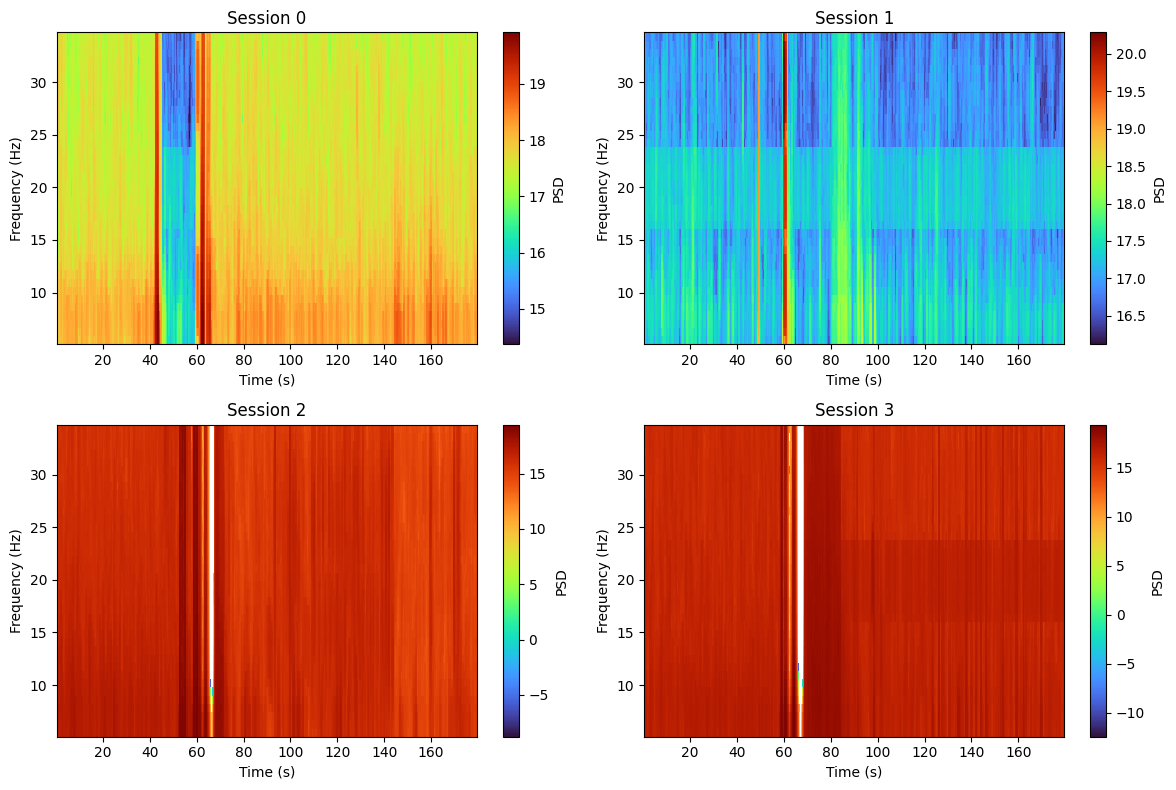

In [87]:

# Example: Plot a few channels
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i in range(min(4, n_sessions)):  # Plot first 4 channels
    im = axes[i].pcolormesh(times, freqs, psd_3d[i], cmap = 'turbo', shading='auto')
    axes[i].set_title(f'Session {i}')
    axes[i].set_xlabel('Time (s)')
    axes[i].set_ylabel('Frequency (Hz)')
    plt.colorbar(im, ax=axes[i], label='PSD')

plt.tight_layout()
plt.show()


In [88]:
psd_3d.shape

(169, 38, 896)

In [89]:
print(times.shape, freqs.shape)


(896,) (38,)


In [90]:
times = times - 60

In [91]:
print(times)

[-5.950e+01 -5.930e+01 -5.910e+01 -5.890e+01 -5.870e+01 -5.850e+01
 -5.830e+01 -5.810e+01 -5.790e+01 -5.770e+01 -5.750e+01 -5.730e+01
 -5.710e+01 -5.690e+01 -5.670e+01 -5.650e+01 -5.630e+01 -5.610e+01
 -5.590e+01 -5.570e+01 -5.550e+01 -5.530e+01 -5.510e+01 -5.490e+01
 -5.470e+01 -5.450e+01 -5.430e+01 -5.410e+01 -5.390e+01 -5.370e+01
 -5.350e+01 -5.330e+01 -5.310e+01 -5.290e+01 -5.270e+01 -5.250e+01
 -5.230e+01 -5.210e+01 -5.190e+01 -5.170e+01 -5.150e+01 -5.130e+01
 -5.110e+01 -5.090e+01 -5.070e+01 -5.050e+01 -5.030e+01 -5.010e+01
 -4.990e+01 -4.970e+01 -4.950e+01 -4.930e+01 -4.910e+01 -4.890e+01
 -4.870e+01 -4.850e+01 -4.830e+01 -4.810e+01 -4.790e+01 -4.770e+01
 -4.750e+01 -4.730e+01 -4.710e+01 -4.690e+01 -4.670e+01 -4.650e+01
 -4.630e+01 -4.610e+01 -4.590e+01 -4.570e+01 -4.550e+01 -4.530e+01
 -4.510e+01 -4.490e+01 -4.470e+01 -4.450e+01 -4.430e+01 -4.410e+01
 -4.390e+01 -4.370e+01 -4.350e+01 -4.330e+01 -4.310e+01 -4.290e+01
 -4.270e+01 -4.250e+01 -4.230e+01 -4.210e+01 -4.190e+01 -4.170